In [29]:
from importlib import reload 
import BWTEK

In [30]:
BWTEK=reload(BWTEK)

In [31]:
pwd

'D:\\winpython3.7\\WPy64-37120\\notebooks\\MChD-python\\src\\mchd_python'

In [32]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [33]:
inst=BWTEK.spectrometer()

inst.integrationTime(20)

inst.readEEPROM()

inst.readConfig()
inst.config['COMMON']['model']

Found 1 spectrometers , initialized 1


'BTC112E'

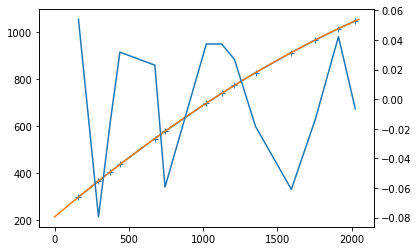

In [34]:
#check interpolation vs calibration points
x=[]
y=[]
for point in inst.config.items('CALIBRATION'):
    a,b=[float(x) for x in point[1].split(';')]
    y.append(a/10)
    x.append(b)
plot(x,y,'-+')
x1=arange(2050)
plot(x1,inst.getInterpolate()(x1))
twinx()
plot(x,y-inst.getInterpolate()(x))

In [35]:
inst.getInterpolate()(843)

620.7522416077725

(620.7522416077725, 'nm')

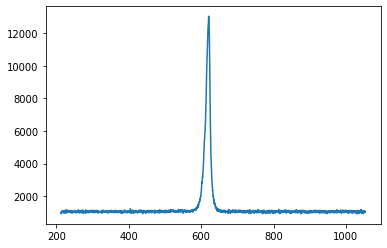

In [36]:
sp=inst.readSpectrum()
plot(inst.wavelengths,sp)
inst.getInterpolate()(argmax(sp)),'nm'

In [5]:
%timeit inst.readSpectrum()

25.6 ms ± 45.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Test spectrometer timing

In [9]:
from timeit import repeat,timeit

In [22]:
rs0=[]

for i in x:
    print(f"timing for {i}")
    inst.integrationTime(i)
    res=repeat(stmt=inst.readSpectrum,number=20)
    print(res)
    rs0.append(res)
rs0=array(rs0)    

timing for 5
[0.22441788504818305, 0.21038357541556252, 0.216986977047668, 0.21480910497894, 0.21066767648892437, 0.20934423308472105, 0.21395077966616327]
timing for 10
[0.3246304649161402, 0.3101303287106134, 0.30862905645500405, 0.3108795478754587, 0.311138497856291, 0.3104200976358129, 0.30850152978860024]
timing for 15
[0.41425018393948676, 0.4206534395535755, 0.41523391047417135, 0.4340695990951531, 0.4111080685767661, 0.42238638525310535, 0.4124924413881672]
timing for 20
[0.5208596430882722, 0.5389390277296116, 0.5114903297591695, 0.5121006865539925, 0.5122158147944447, 0.512530026330694, 0.5208968383659567]
timing for 30
[0.7111223444785537, 0.7132283056772053, 0.7126363694007978, 0.7108385976459317, 0.7118481837545687, 0.7167391856501126, 0.7112952139596018]
timing for 40
[0.9107380641239615, 0.9117752810103639, 0.914688556855026, 0.9112208942524376, 0.9152294824648379, 0.9104553800135591, 0.9259651023277229]
timing for 60
[1.3111115755600622, 1.3114339346334418, 1.3114527093

array([0.00099964, 0.0059004 ])

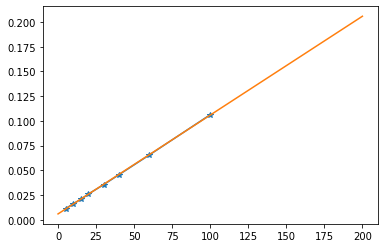

In [28]:
x=array((5,10,15,20,30,40,60,100))
y=[mean(y[0])/20 for y in rs0]
plot(x,y,'-*')
np.polyfit(x,y, 1)
z=np.polyfit(x,y, 1)
plot([0,200],[z[1],z[0]*200+z[1]])
z

In [24]:
rs=[]
x=array((5,10,15,20,30,40,60,100,150,200))
for i in x:
    print(f"timing for {i}")
    inst.integrationTime(i)
    res=repeat(stmt=inst.readSpectrumTTL,number=20)
    print(res)
    rs.append(res)
rs=array(rs)    

timing for 5
[0.2392060189752101, 0.2421401950236941, 0.25062851163272626, 0.23878163856886658, 0.24687745643814196, 0.34336590340774364, 0.30051056717832125]
timing for 10
[0.3506395285197641, 0.3445618201456, 0.35145144829562014, 0.3674946571641158, 0.3497815574477272, 0.36491153368876894, 0.35508454132377665]
timing for 15
[0.4499966170009202, 0.45844561288788555, 0.450749378573164, 0.44645102143545046, 0.48858158111102057, 0.4600131281617905, 0.4631538265615518]
timing for 20
[0.5865305626512054, 0.5544544178957267, 0.5487688540206364, 0.5499353687769144, 0.5646452155004908, 0.546217966452673, 0.5447960441227906]
timing for 30
[0.7451262673405381, 0.743105678160191, 0.7435605232702756, 0.7444167231385563, 0.7495953685148606, 0.7429692954754046, 0.7471362292985759]
timing for 40
[0.959311200135744, 0.9467902069438878, 0.9424146253248864, 0.9434139384520677, 0.9452095847625515, 0.9447859128376876, 0.9432885372301598]
timing for 60
[1.3440687170356114, 1.3417987423745217, 1.3439433158

array([0.00100192, 0.00791809])

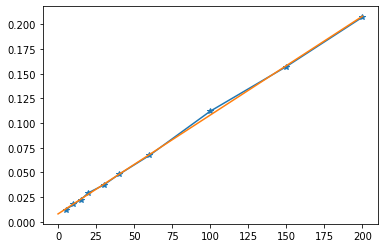

In [25]:
y=[mean(y[0])/20 for y in rs]
plot(x,y,'-*')
z=np.polyfit(x,y, 1)
plot([0,200],[z[1],z[0]*200+z[1]])
z

** Conclusion: integration time time unit 1 ms, dead time 8ms
## High priority

In [38]:
import psutil, os
p = psutil.Process(os.getpid())

In [32]:
rs1=[]
x=array((5,10,15,20,30,40,60,100,150,200))
p.nice(psutil.HIGH_PRIORITY_CLASS)
for i in x:
    print(f"timing for {i}")
    inst.integrationTime(i)
    res=repeat(stmt=inst.readSpectrumTTL,number=20)
    print(res)
    rs1.append(res)
rs1=array(rs1)    

timing for 5
[0.23774831833043208, 0.24608501990292098, 0.2526586653129925, 0.24153586032139174, 0.2505824603365454, 0.23930343517872643, 0.25114286918710604]
timing for 10
[0.3421430643736585, 0.33288144022958477, 0.33319529752498056, 0.350429818001885, 0.3503235457799292, 0.3369410391085239, 0.3398606912867308]
timing for 15
[0.4675088622175281, 0.43502321516689335, 0.45066152686968053, 0.43751954966091944, 0.43679335614410775, 0.44068469067156, 0.4438824218304944]
timing for 20
[0.5426890202020331, 0.5366743666795628, 0.5451867716590186, 0.548147161522138, 0.5394013118952898, 0.5416425930563946, 0.5485938590950354]
timing for 30
[0.785427527835509, 0.740329493481795, 0.7631783754447952, 0.7565399039795011, 0.7690789634491466, 0.7458184537463239, 0.7424258901803569]
timing for 40
[0.9636538373661097, 0.9416179379009009, 0.9398637377571504, 0.9430958302675663, 0.937539210021896, 0.941242442716657, 0.9370174134119225]
timing for 60
[1.3399751110455327, 1.3420516702626628, 1.34080403437

array([0.00099633, 0.00775394])

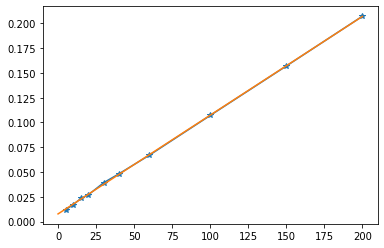

In [33]:
y=[mean(y[0])/20 for y in rs1]
plot(x,y,'-*')
z=np.polyfit(x,y, 1)
plot([0,200],[z[1],z[0]*200+z[1]])
z

Conclusion: integration time unit 0.9ms, dead time 7.7ms
## Test on USB 3 port

In [10]:
rs3=[]
x=array((5,10,15,20,30,40,60,100,150,200))
p.nice(psutil.HIGH_PRIORITY_CLASS)
for i in x:
    print(f"timing for {i}")
    inst.integrationTime(i)
    res=repeat(stmt=inst.readSpectrumTTL,number=20)
    print(res)
    rs3.append(res)
rs3=array(rs3)  

timing for 5
[0.22730353011524515, 0.22292794849623032, 0.2231443895882979, 0.22824049687223147, 0.22186593475806593, 0.2193129217457408, 0.21745634602802255]
timing for 10
[0.3244933737498401, 0.32938154171946343, 0.32871131823960775, 0.34206229748499695, 0.33652268079473213, 0.3332367436915926, 0.32810273264849155]
timing for 15
[0.4284715326827824, 0.42960226912448274, 0.42663125203909846, 0.4313833915646068, 0.4261229165773681, 0.4297999354573374, 0.43338166357827745]
timing for 20
[0.5395189198207966, 0.5268902374440252, 0.5267744007220836, 0.5281612532187197, 0.5254796508178181, 0.5234512683412582, 0.5261966340753386]
timing for 30
[0.7287550315469105, 0.7258116452392347, 0.7404028213149481, 0.72821658562229, 0.7689549791901289, 0.7359188420295304, 0.7350002957910178]
timing for 40
[0.9576763791211924, 0.9241722899432112, 0.9242335735912093, 0.9243455136650134, 0.9431277119342631, 0.9194995003434343, 0.920879622266014]
timing for 60
[1.3206502159628677, 1.3199374835942272, 1.3319

array([0.00099635, 0.0066758 ])

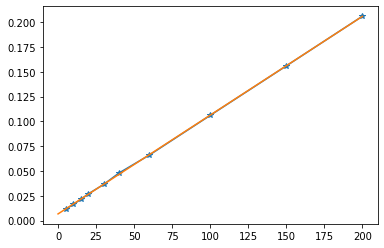

In [11]:
y=[mean(y[0])/20 for y in rs3]
plot(x,y,'-*')
z=np.polyfit(x,y, 1)
plot([0,200],[z[1],z[0]*200+z[1]])
z

In [ ]:
p.nice(psutil.REALTIME_PRIORITY_CLASS)

# read datas
n=300*100
delay=0.00
inst.integrationTime(30)

res=np.zeros((2048,n))
volts=np.zeros(n)
ttlin=np.zeros(n)
tstamps=np.zeros((2,1),dtype='datetime64[us]')
tstamps[0,0]=np.datetime64(datetime.datetime.now())
for i in range(n):
    res[:,i],ttlin[i]=inst.readSpectrumTTL()
tstamps[1,0]= np.datetime64(datetime.datetime.now())

p.nice(psutil.NORMAL_PRIORITY_CLASS)  

print('Average time',(tstamps[1,0]-tstamps[0,0])/n, 'total time', (tstamps[1,0]-tstamps[0,0]))

In [ ]:
np.savez('run30000-low',res=res,ttlin=ttlin,tstamps=tstamps)

In [25]:
datas=np.load('run30000.npz')

In [18]:
%timeit     res[:,i],ttlin[i]=inst.readSpectrumTTL()

36.8 ms ± 67 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


(1719.2258931682916, numpy.timedelta64(36931,'us'), 36931.2063)

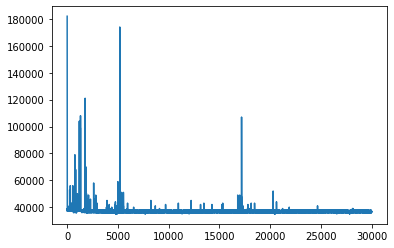

In [73]:
#time offset and jitter
delta=tstamps[1,:]-tstamps[0,:]
plot(delta)
np.std(delta.astype(int)),np.mean(delta),np.mean(delta.astype(int))

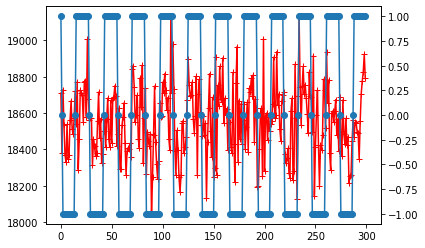

In [41]:
plot(res[840,:],'r-+')
plt.twinx()
plot(ttlin-1,'-o')

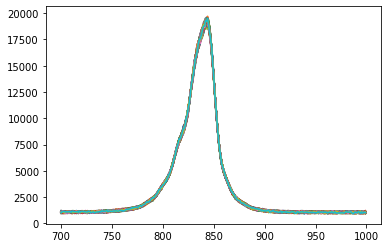

In [42]:
plot(np.arange(700,1000),res[700:1000,:]);

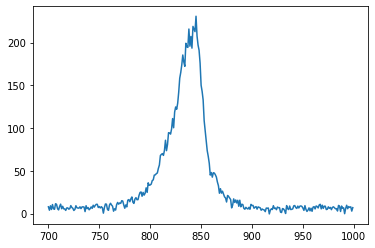

In [47]:
plot(np.arange(700,1000),mean(res*(ttlin-1),axis=1)[700:1000])

In [86]:
%timeit mean(res*(ttlin-1),axis=1)

The slowest run took 212.39 times longer than the fastest. This could mean that an intermediate result is being cached.
39 s ± 59.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


array([[1055., 1090.,  973., ..., 1024.,  987., 1017.],
       [1055., 1090.,  973., ..., 1024.,  987., 1017.],
       [ 881.,  880.,  808., ...,  925.,  882.,  819.],
       ...,
       [ 999., 1008.,  997., ..., 1005., 1084., 1027.],
       [1006., 1041., 1040., ...,  991., 1031., 1052.],
       [ 983., 1036., 1092., ..., 1000.,  962., 1001.]])